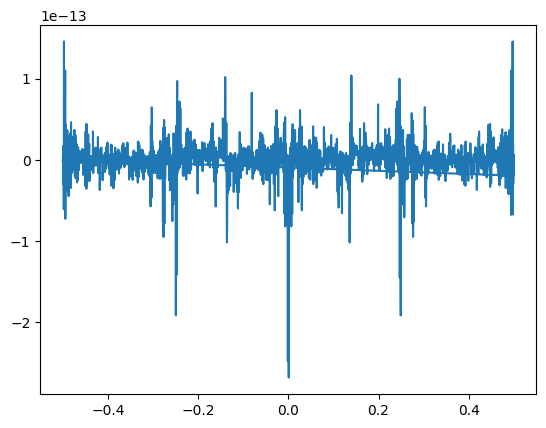

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi
t = np.arange(0, 3, 1e-3)
s = np.sin(2 * pi * t)
sp = np.fft.fft(s)
freq = np.fft.fftfreq(t.shape[-1])
# print(freq)
plt.plot(freq, sp.real)
# plt.plot(t, s)
# plt.show()

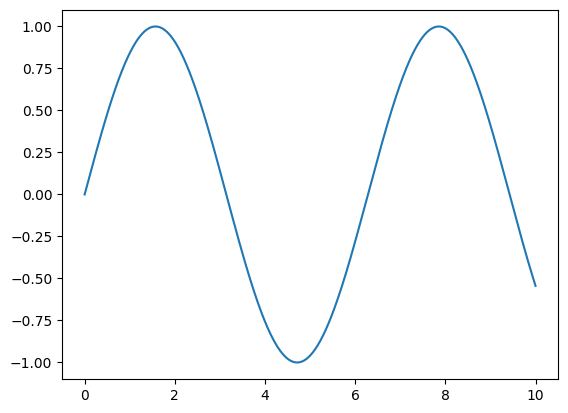

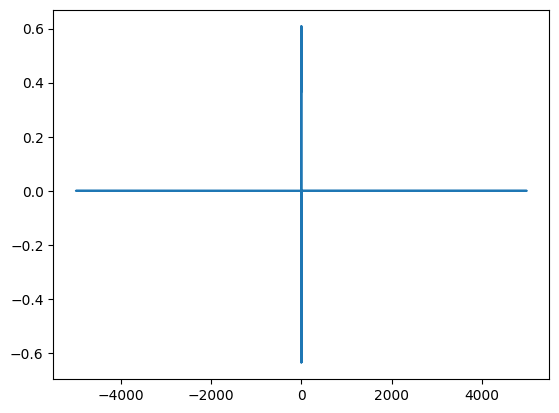

In [40]:
import numpy as np
import matplotlib.pyplot as plt
# 产生正弦信号
Ts = 1e-4
t = np.arange(0, 10, Ts)
x = np.sin(t)
 
# FFT变换
X = np.fft.fft(x, np.size(x, 0), axis = 0) / x.size * 2
freq = np.fft.fftfreq(np.size(x, 0), Ts)
 
plt.figure(1)
plt.plot(t, x)
plt.show()
plt.figure(2)
plt.plot(freq,np.real(X))
plt.show()

> https://www.jianshu.com/p/58630d0489ea

In [128]:
import matplotlib.pyplot as plt 
import numpy as np 
def show(ori_func, ft, sampling_period = 1): 
    n = len(ori_func) 
    interval = sampling_period / n 
    # 绘制原始函数
    plt.subplot(2, 1, 1) 
    plt.plot(np.arange(0, sampling_period, interval), ori_func, 'black') 
    plt.xlabel('Time'), plt.ylabel('Amplitude') 
    # 绘制变换后的函数
    plt.subplot(2,1,2) 
    frequency = np.arange(n / 2) / (n * interval) 
    # frequency = np.arange(n / 2)
    nfft = abs(ft[range(int(n / 2))] / n ) 
    plt.plot(frequency, nfft, 'red') 
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum') 
    plt.show() 

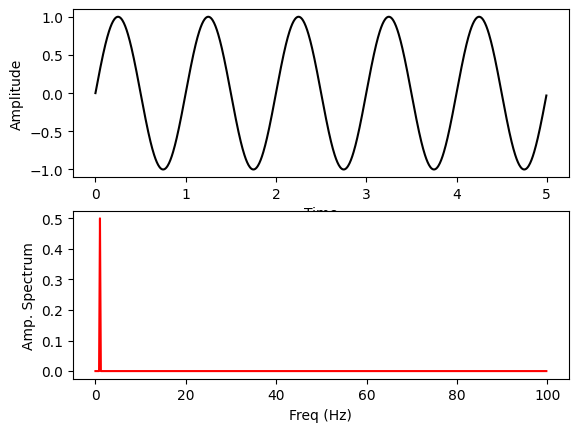

In [49]:
time = np.arange(0, 5, .005) 
x = np.sin(2 * np.pi * 1 * time) 
y = np.fft.fft(x) 
show(x, y) 

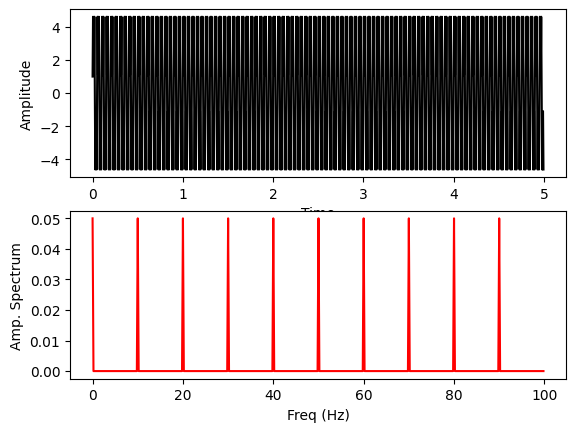

In [58]:
# 将其与频率为 20 和 60 的波叠加起来
x2 = np.sin(2 * np.pi * 20 * time) 
x3 = np.sin(2 * np.pi * 60 * time) 
x += x2 + x3 
y = np.fft.fft(x) 
# print(y)
show(x, y) 

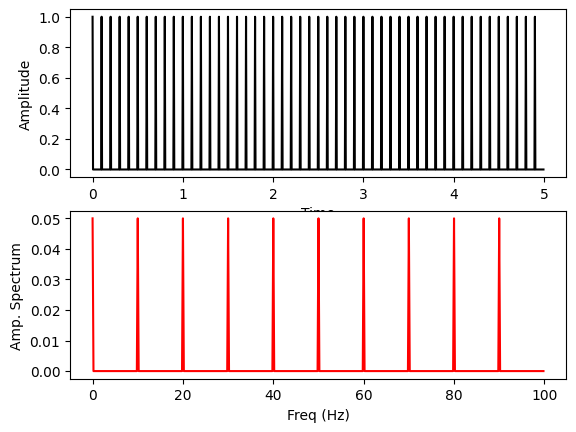

In [65]:
# 生成方波，振幅是 1，频率为 10Hz
# 我们的间隔是 0.05s，每秒有 200 个点
# 所以需要每隔 20 个点设为 1
x = np.zeros(len(time)) 
x[::20] = 1 
y = np.fft.fft(x) 
# print(len(x), len(y))
# show(x, y) 
# print(np.real(y))
show(x, np.real(y))

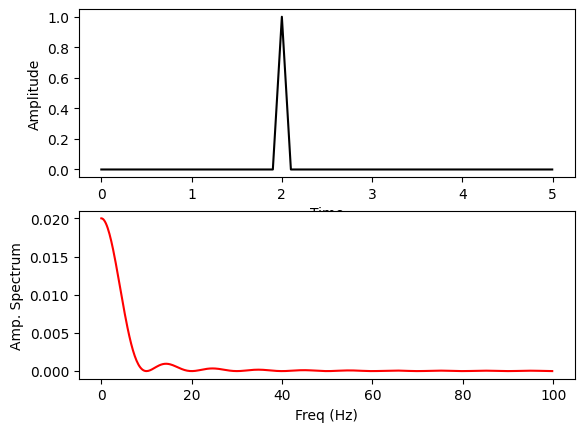

In [54]:
# 生成脉冲波
x = np.zeros(len(time)) 
x[380:400] = np.arange(0, 1, .05) 
x[400:420] = np.arange(1, 0, -.05) 
y = np.fft.fft(x) 
show(x, y) 

In [179]:
import matplotlib.pyplot as plt 
import numpy as np 
def show(ori_func, ft, sampling_period = 0.512): 
    n = len(ori_func) 
    interval = sampling_period / n 
    # print(interval)
    # 绘制原始函数
    plt.subplot(2, 1, 1) 
    N = np.arange(0, sampling_period, interval)
    print(len(N))
    plt.plot(N, ori_func, 'black') 
    plt.xlabel('Time'), plt.ylabel('Amplitude') 
    # 绘制变换后的函数
    plt.subplot(2,1,2) 
    frequency = np.arange(n / 2) / (n * interval) 
    # frequency = np.arange(n / 2)
    nfft = abs(ft[range(int(n / 2))] / (sampling_period * 1e3 / 2)) 
    plt.plot(frequency, nfft, 'red') 
    plt.xlabel('Freq (Hz)'), plt.ylabel('Amp. Spectrum') 
    plt.show() 
    # return nfft
    
    for i, f in enumerate(nfft):
        if f <= 1e-2: nfft[i] = 0
    with open("D:/GitRepo/transformer-study-cases/Transformer FFT/note/test.txt", "a") as f:
        f.write(str(nfft))

512
512


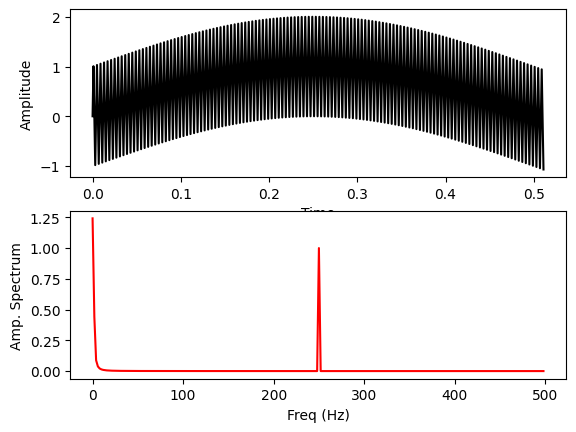

In [180]:
time = np.arange(0, 0.512, 1e-3) 
print(len(time))
x = np.sin(2 * np.pi * 1 * time) + np.sin(2 * np.pi * 250 * time)
y = np.fft.fft(x) 
show(x, y) 

In [183]:
file = "D:/GitRepo/transformer-study-cases/Transformer FFT/note/test.txt"

In [186]:
with open(file, "r") as f:
    data = f.read()
    print(len(data))
    print(data[1])

5062
1
